In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(13)

# White Noise Model

https://machinelearningmastery.com/white-noise-time-series-python/

Stationary series

## Properites

- Fixed/constant mean
- Fixed/constant variance
- No correlation over time (pattern is random)

Note that *Gaussian white noise* model has mean of 0 and variance of 1

## Example

In [ ]:
# Create a date series
n_days = 100
date_series = pd.date_range(start='1/1/2015', periods=n_days)

# Create a normally distributed temperature values for each day
avg_temp = 10
std_temp = 3

temp_series = np.random.normal(avg_temp, std_temp, n_days)

In [ ]:
time_series = pd.Series(data=temp_series, index=date_series)


ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")
plt.show()

# Random Walk Model

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

## Properites

Previous value will influence the current value

- No specified mean
- No specified variance
- Strong dependence over time

Formula: $Y(t) = Y(t-1) + \epsilon(t)$

$\epsilon(t)$ is a white noise model with mean=0

## Example

In [ ]:
avg = 0
std = 10
n_pts = 1500

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

## Variation: Random Walk w/ a drift

"Drifts" with a particular value

Formula: $Y(t) = c + Y(t-1) + \epsilon(t)$

In [ ]:
# Same values from above but have a constant "drift" in the epsilon
c = 0.5
vals_drift = y0 + np.cumsum(c + epsilon) 
time_series_drift =  pd.Series(vals_drift, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
time_series_drift.plot()
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# Autoregressive (AR) Model

## Properties

Formula: $Y(t) = \mu + \phi * Y(t-1)+\epsilon(t)$

> $\phi = 0$: simply the white noise model (mean of $\mu$)
>
> $\phi \lt 0$: oscillates
>
> $\phi \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

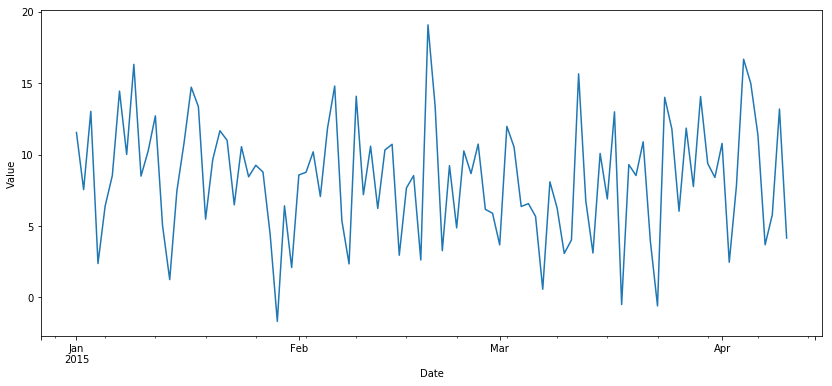

In [68]:
avg = 0
std = 4
n_pts = 100


mu = 7
phi = 0.1
# phi = 0.5
# phi = 0.9
# phi = -0.1
# phi = -0.5
# phi = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

#
vals = []
y = 0
for e in epsilon:
    y = y * phi  + e + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# Moving Average (MA) Model

Formula: $Y(t) = \mu + \theta * \epsilon(t-1)+\epsilon(t)$

> $\theta = 0$: simply the white noise model (mean of $\mu$)
>
> $\theta \lt 0$: oscillates
>
> $\theta \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

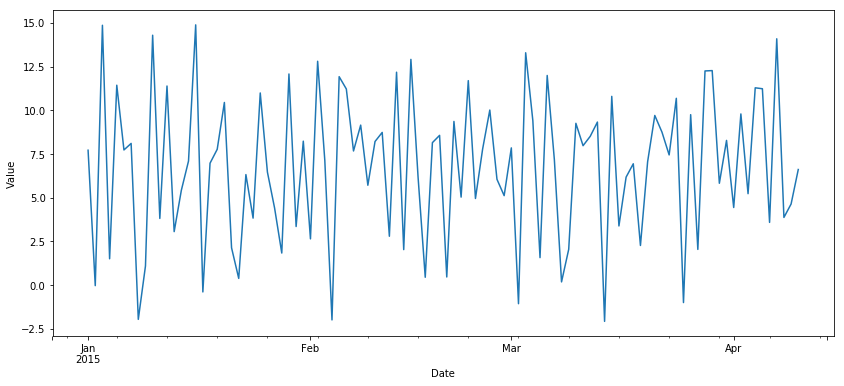

In [64]:
avg = 0
std = 4
n_pts = 100


mu = 7
# theta = 0.1
# theta = 0.5
# theta = 0.9
# theta = -0.1
theta = -0.5
# theta = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts+1)

#
vals = []
y = 0
for i in range(len(epsilon)-1):
    y = epsilon[i] * theta  + epsilon[i+1] + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# ARMA Model

# Integrated ARMA (ARIMA) Model